# Linear Regression

In [30]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split # to split the data into test and train
from sklearn.linear_model import LinearRegression #to build the model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler #transform the data with mean 0 and sd=1
import seaborn as sns; 

In [31]:
#loading dataset
mydata=pd.read_csv("monet.csv")

In [32]:
mydata

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2
...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1
426,9.352500,25.9,39.6,1,375,2
427,8.252500,25.6,39.6,1,375,1
428,3.410000,25.6,39.4,1,386,2


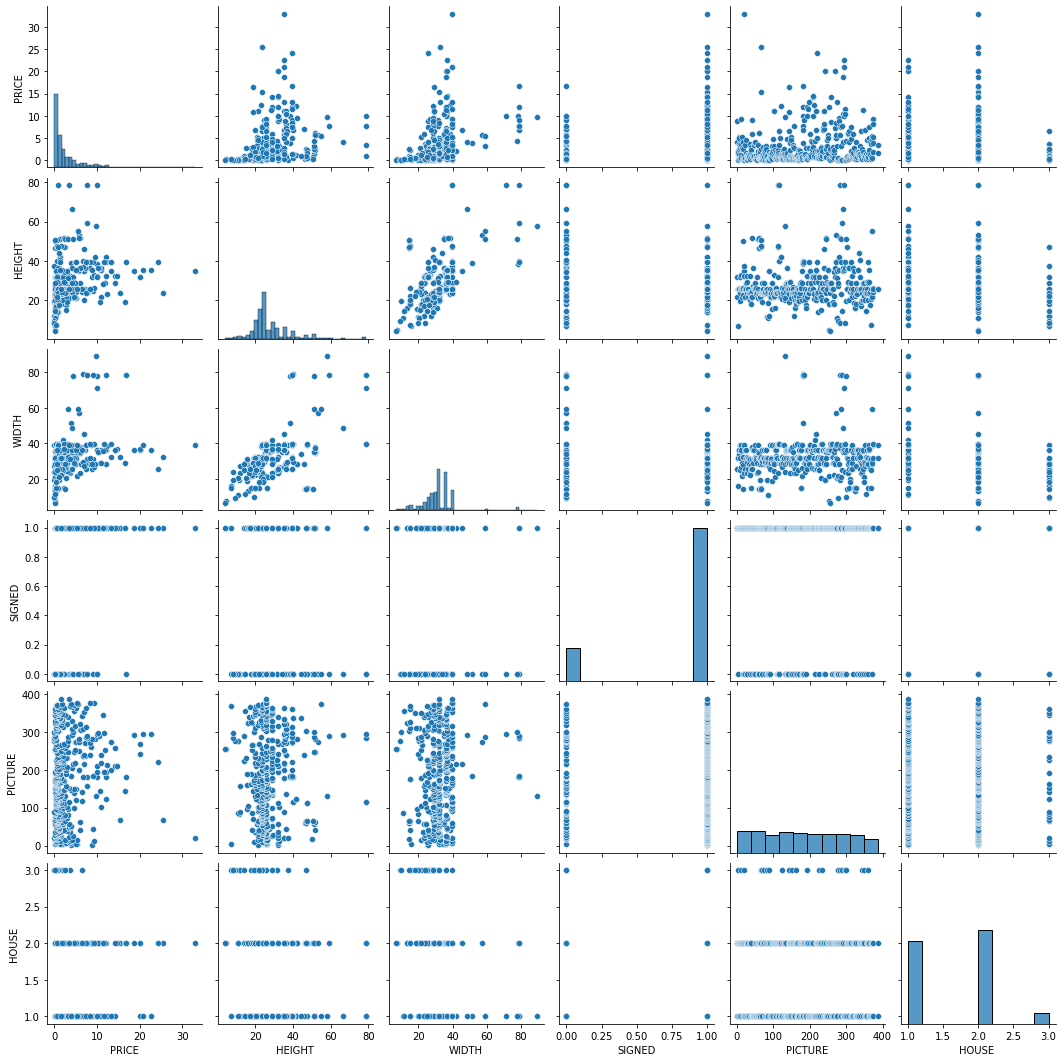

In [33]:
sns.pairplot(mydata)

In [34]:
#Adding the new variable for i.e size with value as width*height 
#This variable is crucial for model creation
#because the painting's area will be used to estimate the cost of the painting.
mydata["SIZE"]=mydata["HEIGHT"]*mydata["WIDTH"]
print(mydata)

        PRICE  HEIGHT  WIDTH  SIGNED  PICTURE  HOUSE      SIZE
0    3.993780    21.3   25.6       1        1       1   545.28
1    8.800000    31.9   25.6       1        2       2   816.64
2    0.131694     6.9   15.9       0        3       3   109.71
3    2.037500    25.7   32.0       1        4       2   822.40
4    1.487500    25.7   32.0       1        4       2   822.40
..        ...     ...    ...     ...      ...     ...      ...
425  5.282500    25.6   39.4       1      375       1  1008.64
426  9.352500    25.9   39.6       1      375       2  1025.64
427  8.252500    25.6   39.6       1      375       1  1013.76
428  3.410000    25.6   39.4       1      386       2  1008.64
429  1.542500    25.7   32.0       1      387       1   822.40

[430 rows x 7 columns]


In [35]:
#Creating the target variable
y=mydata.pop("PRICE")
X=mydata # not including the target variable


In [36]:
#splitting the data into test and train datasets
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=45,shuffle=True)
print("The first 5 rows of X_train data is:\n",X_train.head())
print(" ")
print(" ")
print(" ")

The first 5 rows of X_train data is:
      HEIGHT  WIDTH  SIGNED  PICTURE  HOUSE      SIZE
231    25.0   35.8       1      193       2   895.00
420    21.3   28.7       1      370       2   611.31
129    23.9   32.0       1      109       1   764.80
325    10.6   20.5       0      276       1   217.30
157    57.9   89.0       1      131       1  5153.10
 
 
 


In [37]:
#transform the data so that the transformed data having mean 0 and sd=1 for each column
scale= StandardScaler()  # creating an instance of StandardScaler()
scale.fit(X_train)


StandardScaler()

In [38]:
#tranform the train and test data
X_train_transformed=scale.transform(X_train)
X_test_transformed=scale.transform(X_test)


In [39]:
#Task1
#model1:simple linear regression with y_train-dependent variable and independent variable size=width*height
#extract the independent variable
size_X_train=np.reshape(X_train_transformed[:,5],(X_train_transformed.shape[0],1))
size_X_test=np.reshape(X_test_transformed[:,5],(X_test_transformed.shape[0],1))


In [40]:
model_1st=LinearRegression() #building the first model
model_1st.fit(size_X_train,y_train) #fitting the training data

LinearRegression()

In [41]:
#The intercept and coefficients are as,
print("The Intercept of Regression line for 1 st model=",model_1st.intercept_)
print("The coefficient for 1st model=",model_1st.coef_)


The Intercept of Regression line for 1 st model= 2.9062121424418605
The coefficient for 1st model= [1.44093352]


In [42]:
#prediction on test data
predictionmodel_1=model_1st.predict(size_X_test)
print("The predicted price for first model is:\n",predictionmodel_1,sep=" ")


The predicted price for first model is:
 [ 3.12068337  2.91902895  3.19887928  2.24855272  3.99378057  2.55480625
  2.66805711  2.54773397  4.03093364  3.19211346  3.19887928  7.89063335
  1.66018574  2.66805711  1.47486829  2.6816359   1.25515596  1.68161476
  3.19211346  1.79524281  3.40861968  3.78892004 11.70768718  2.65598708
  5.42011907  3.20918124  2.66805711  5.12694927  2.09996401  3.7226763
  3.4310624   2.33962019  0.95118913  1.88011023  2.64391705  3.72974859
  3.19211346  2.68309751  2.6816359   4.40246436  1.2124865   2.92756284
  2.73491379  2.35315182  8.0527537   1.54127705  2.36187431  1.85747892
  3.19211346  2.2139221   2.96471591  2.96895928  1.72763176  2.66805711
  5.3896611   1.94663686  3.78892004  3.40861968  2.93491801  3.72974859
  2.20409162  2.02466775  2.92756284  3.76388415  7.81290894  2.20086195
  2.93963287  1.50138936  2.02572859  2.35631078  2.20409162  3.05243582
  2.93491801 15.34406769  1.91040319  2.51765318  2.51567294  1.85747892
  1.9028122

In [43]:
#The root mean square error for the first model using test data is,
errormodel_1=np.sqrt(metrics.mean_squared_error(y_test,predictionmodel_1))
print("The prediction error for the first model is:\n",errormodel_1)
print(" ")
print(" ")
print(" ")


The prediction error for the first model is:
 4.735632915601799
 
 
 


In [44]:
#R^2 score on test data
score_model1_test=model_1st.score(size_X_test,y_test)
print("The R^2 score on test data caused with model1:\n",(score_model1_test)*100)
print(" ")
print(" ")


The R^2 score on test data caused with model1:
 8.438382002799138
 
 


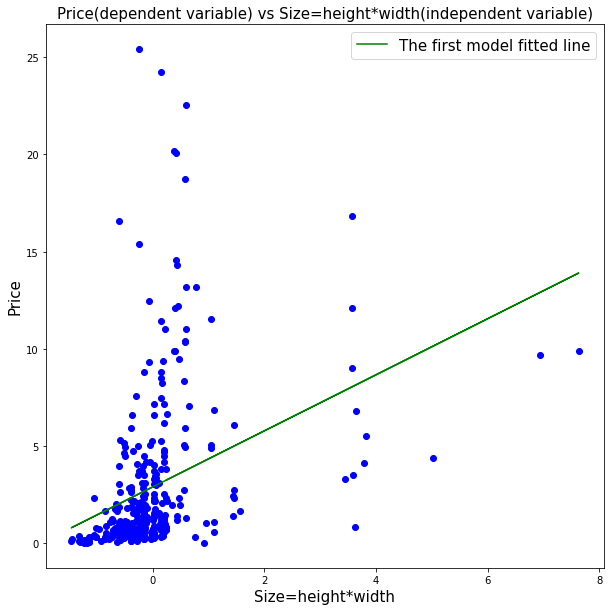

In [45]:
#Creating a scatter plot with regression line
plt.figure(figsize=(10,10))
plt.scatter(size_X_train,y_train,c="blue")
plt.plot(size_X_train, model_1st.predict(size_X_train),color='g',label="The first model fitted line") #plot the fitted line
plt.xlabel("Size=height*width",fontsize =15)
plt.ylabel("Price",fontsize=15)
plt.title("Price(dependent variable) vs Size=height*width(independent variable)",fontsize=15)
plt.legend(fontsize=15)


In [46]:
#Model2:
#simple linear regression with y_train as dependent variable and independent variable as width
#extracting independent variable width
width_X_train=np.reshape(X_train_transformed[:,1],(X_train_transformed.shape[0],1))
width_X_test=np.reshape(X_test_transformed[:,1],(X_test_transformed.shape[0],1))


In [47]:
model_2nd=LinearRegression() #building the second model
model_2nd.fit(width_X_train,y_train) #Fitting th training data

LinearRegression()

In [49]:
#intercepts and coefficient
print("The Intercept of Regression line for second model is",model_2nd.intercept_)
print("The coefficient for second model is ",model_2nd.coef_)

The Intercept of Regression line for second model is 2.9062121424418605
The coefficient for second model is  [1.35839723]


In [50]:
#predicting with test data
predictionmodel_2=model_2nd.predict(width_X_test)
print("The predicted price by the second model is:\n",predictionmodel_2)
print(" ")

The predicted price by the second model is:
 [ 3.966497    3.52751642  3.54123456  2.52609196  3.966497    2.88276369
  2.93763626  2.93763626  3.966497    3.52751642  2.49865568  6.39460836
  1.75787594  2.93763626  1.40120422  2.9513544   1.37376793  1.04453249
  3.52751642  1.11312321  3.966497    3.56867085  9.3577273   2.91019997
  5.61267419  3.52751642  2.93763626  3.966497    1.49723122  2.9513544
  3.52751642  2.49865568 -0.14894597  1.31889536  2.88276369  3.52751642
  3.52751642  2.93763626  2.9513544   3.966497    1.85390295  3.52751642
  3.01994512  2.49865568  9.3577273   1.48351308  2.55352825  1.26402279
  3.52751642  2.9513544   3.99393329  3.58238899  1.79903037  2.93763626
  3.80187929  1.88133923  3.56867085  3.966497    3.966497    3.52751642
  2.55352825  2.3477561   3.52751642  3.52751642  9.27541844  2.52609196
  3.55495271  2.33403796  2.55352825  2.53981011  2.55352825  2.8553274
  3.966497    9.3577273   2.4437831   2.93763626  2.9513544   1.85390295
  1.4835

In [51]:
#error root mean square error
errormodel_2=np.sqrt(metrics.mean_squared_error(y_test,predictionmodel_2))
print("The prediction error for the second model is:\n",errormodel_2,)
print(" ")


The prediction error for the second model is:
 4.635458801703964
 


In [59]:
#R^2 score on test data
score_model_2_test=model_2nd.score(width_X_test, y_test)
print("R^2 score on test data caused by model2:\n",score_model_2_test*100)
print(" ")
print(" ")
print(" ")

R^2 score on test data caused by model2:
 12.271066724583068
 
 
 


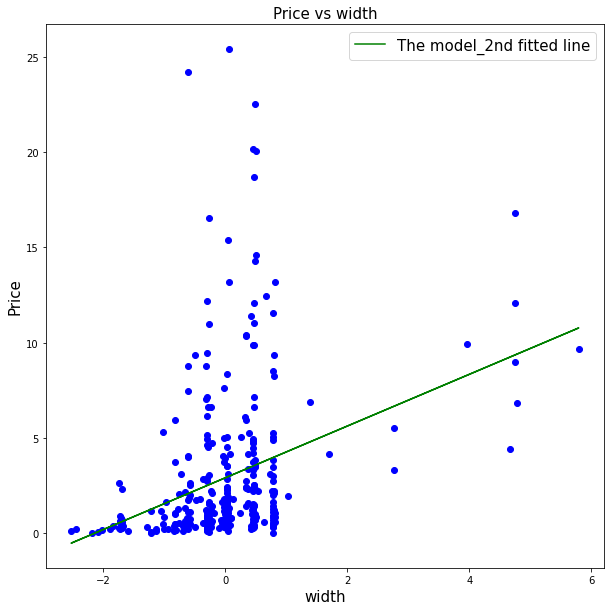

In [53]:
#create a figure
plt.figure(figsize=(10,10))
plt.scatter(width_X_train,y_train,c="blue")
plt.plot(width_X_train, model_2nd.predict(width_X_train),color='g',label="The model_2nd fitted line") 
plt.xlabel("width",fontsize =15)
plt.ylabel("Price",fontsize=15)
plt.title("Price vs width",fontsize=15)
plt.legend(fontsize=15)


In [54]:
#Task2:
#Multivariate linear regression
model_task2=LinearRegression()


In [55]:
 #fitting the data 
model_task2.fit(X_train_transformed,y_train)


LinearRegression()

In [56]:
#prediction with test data
prediction_task2=model_task2.predict(X_test_transformed)
print("The predicted price by the multi regression model:\n",prediction_task2)
print(" ")

The predicted price by the multi regression model:
 [ 4.954522    4.41384443  1.73527772  2.54351217  4.27711009  2.18053762
  2.85897363  3.93888845  5.12242291  4.33777644  3.84680959  6.61844834
  1.80444868  2.9515782   1.24741419  2.30299844 -1.22863346  0.29334298
  4.09224659  2.23743521  3.6681763   4.98207261  9.37457483  0.5120652
  3.99311536  3.97504775  2.70604836  3.59748034  0.46854607  5.36649713
  1.86914399  3.7834959  -2.22462224  2.39549408  2.74758671  5.21762899
  4.35894281  2.69964468  2.54905572  5.81329663 -0.6208483   3.66919103
  2.68220364  2.47233999  7.26773942  0.86794053  2.40813754  1.31506424
  3.77422367  2.31539453  3.51671176  4.3581445  -0.32167169  2.85474036
  3.22466798  1.13548266  5.46466576  3.46921246  3.60394648  4.70540294
  2.23049937  2.61586019  3.97874741  4.94565927  7.12090521  1.85000708
  3.02242486 -0.78328434  1.80351169  2.00732007  2.58186104  3.79737299
  4.31037567 13.21787396  1.79146056  2.86321715  2.62801457  0.33021561


In [57]:
#RMSE (Root Mean Squared Error)
error_task2=np.sqrt(metrics.mean_squared_error(y_test,prediction_task2))
print("The prediction error of the multiple regression model:\n",error_task2)
print(" ")
print(" ")
print(" ")

The prediction error of the multiple regression model:
 4.539947389351305
 
 
 


In [58]:
 #R^2 score on test data 
score_task2_test=model_task2.score(X_test_transformed,y_test)
print("The R^2 score on test data caused with model:\n",score_task2_test*100)


The R^2 score on test data caused with model:
 15.849047180821918
